In [2]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from utils.config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from utils.vis_tool import vis_bbox
from utils import array_tool as at
%matplotlib inline

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

You'll need to download pretrained model from [google dirve](https://drive.google.com/open?id=1cQ27LIn-Rig4-Uayzy_gH5-cW-NRGVzY) 
# 1. model converted from chainer

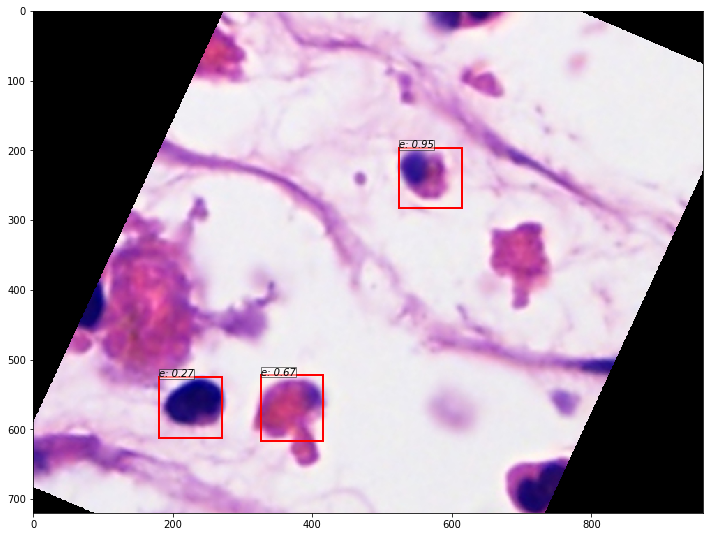

In [39]:
img = read_image("/data1/hzw/EOS/best/aug_imgs/40027.jpg")
img = t.from_numpy(img)[None]
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load("/data1/hzw/baseline_faster_rcnn/03_faster_rnn/checkpoints/fasterrcnn_08121954.pth_0.9090909090909093")
#trainer.load("/data1/hzw/baseline_faster_rcnn/03_faster_rnn/checkpoints/fasterrcnn_08130800.pth_0.909067963838282")
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 2. model trained with torchvision pretrained model

ValueError: No corresponding name is given

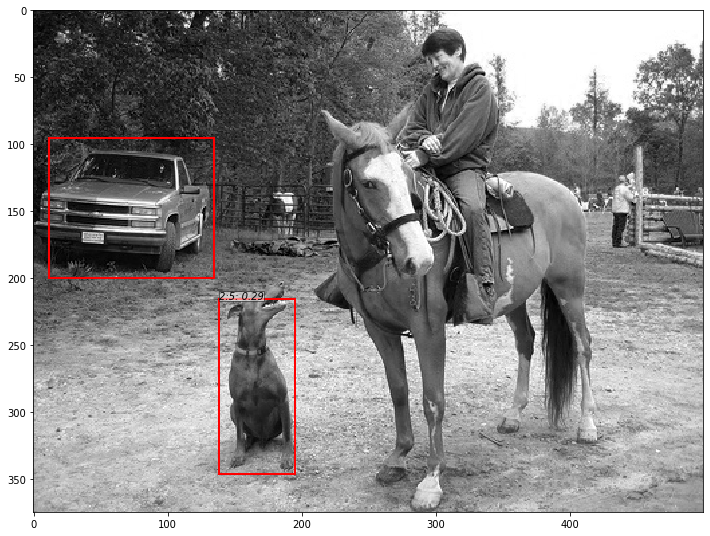

In [5]:
trainer.load('model/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False # this model was trained from torchvision-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))
# it failed to find the dog, but if you set threshold from 0.7 to 0.6, you'll find it

# 3. model trained with caffe pretrained model

ValueError: No corresponding name is given

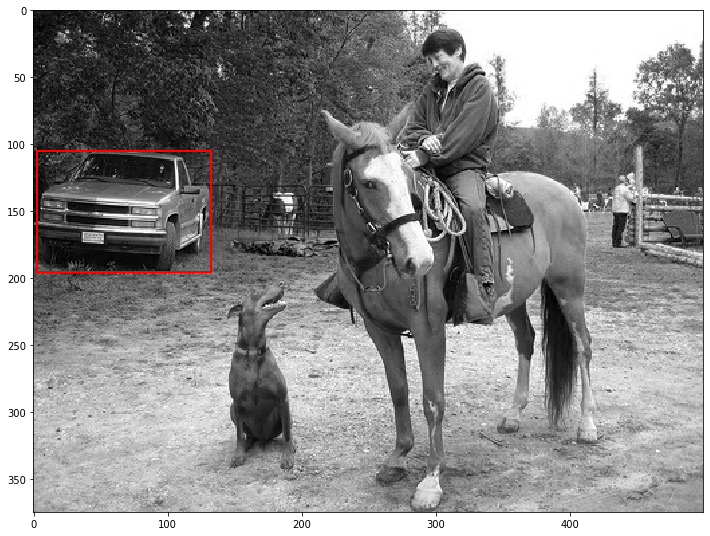

In [6]:
trainer.load('model/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True # this model was trained from caffe-pretrained model
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),
         at.tonumpy(_bboxes[0]),
         at.tonumpy(_labels[0]).reshape(-1),
         at.tonumpy(_scores[0]).reshape(-1))